# Extract data from image

In [1]:
# pip install pyPDF2

In [2]:
#pip install pytesseract

In [3]:
# pip install Image

In [4]:
# pip install pandas

In [5]:
# pip install opencv-python

In [6]:
# to extract data from images and pdf
import pytesseract

# to identify required content
import cv2

# to work on file
import pandas as pd

# image operations
from PIL import Image

In [7]:
# image path
img_file="input.png"

In [8]:
img_file

'hunt1.png'

In [9]:
im=Image.open(img_file)

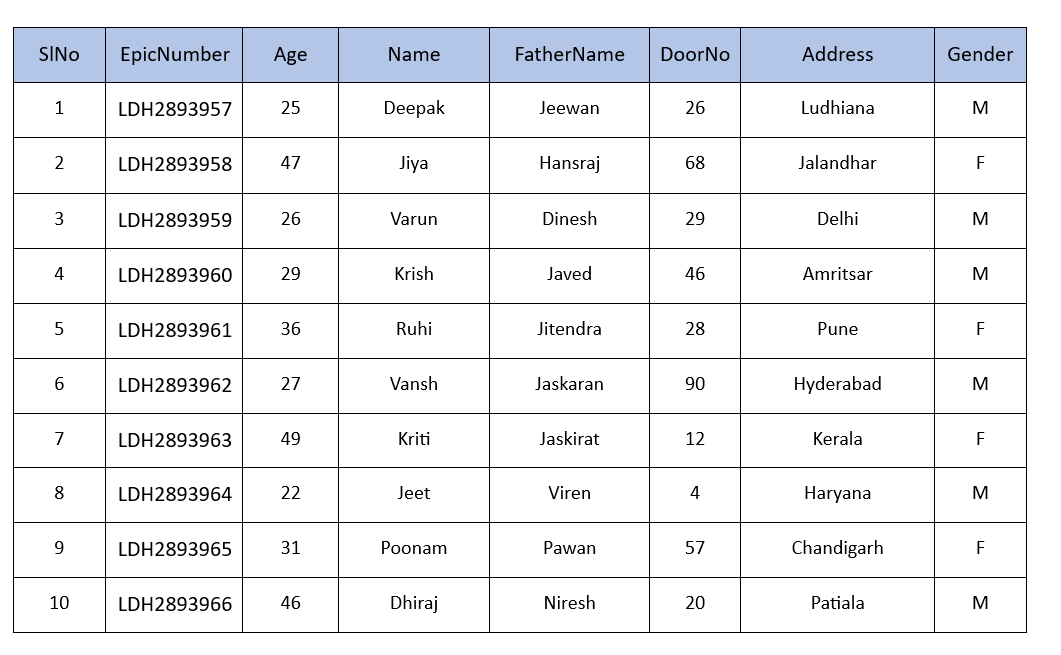

In [10]:
im

In [11]:
# new_im = im.resize((700,1000))


In [12]:
# new_im

In [13]:
# nimc=new_im.crop((10,50,700,400))

In [14]:
# nimc

In [15]:
# nimc.show

In [16]:
# ocr_res=pytesseract.image_to_string(im)

In [17]:
# ocr_res

In [18]:
# l=['']*len(ocr_res)
# k=0
# new_str = l

# for i in range(len(ocr_res)):
#     if ocr_res[i] == '|' or ocr_res[i] == '_':
#         continue
#     new_str[i] = ocr_res[i]
#     k+=1
#     print(new_str[i], end="")

In [19]:
import pytesseract
from PIL import Image
import openpyxl

def perform_ocr(image_path):
    # Perform OCR using pytesseract
    ocr_output = pytesseract.image_to_string(Image.open(image_path))
    return ocr_output

def save_text_to_excel(text, excel_file):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.title = "OCR Output"

    # Split the text into lines and save them to the Excel file
    lines = text.split("\n")
    for row_num, line in enumerate(lines, start=1):
        ws.cell(row=row_num, column=1, value=line)

    wb.save(excel_file)

# Example usage:
image_path = img_file  # Replace with the actual image file path
output_text = perform_ocr(image_path)

excel_file_path = "output.xlsx"  # Replace with the desired Excel file path
xi=save_text_to_excel(output_text, excel_file_path)


In [20]:
xi

In [21]:
import openpyxl

def split_data_to_cells(input_excel, output_excel, delimiter):
    wb = openpyxl.load_workbook(input_excel)
    ws = wb.active

    for row in ws.iter_rows():
        for cell in row:
            if cell.value:
                data_list = cell.value.split(delimiter)
                for i, data in enumerate(data_list, start=0):
                    cell_offset = ws.cell(row=cell.row, column=cell.column + i)
                    cell_offset.value = data.strip()

    wb.save(output_excel)

# Example usage:
input_file_path = excel_file_path  # Replace with the path to your input Excel file
output_file_path = "output2.xlsx"  # Replace with the desired output Excel file path
delimiter = "|" # Replace with the delimiter used to split the data

split_data_to_cells(input_file_path, output_file_path, delimiter)


In [22]:
# import openpyxl

# def split_data_to_cells(input_excel, output_excel, delimiter):
#     wb = openpyxl.load_workbook(input_excel)
#     ws = wb.active

#     for row in ws.iter_rows():
#         for cell in row:
#             if cell.value:
#                 data_list = cell.value.split(delimiter)
#                 for i, data in enumerate(data_list, start=0):
#                     cell_offset = ws.cell(row=cell.row, column=cell.column + i)
#                     cell_offset.value = data.strip()

#     wb.save(output_excel)

# # Example usage:
# input_file_path1 = output_file_path  # Replace with the path to your input Excel file
# output_file_path = "dataset_d2.xlsx"  # Replace with the desired output Excel file path
# delimiter = " "  # Replace with the delimiter used to split the data

# split_data_to_cells(input_file_path, output_file_path, delimiter)

In [23]:
# import openpyxl

# def replace_with_next_cell(file_path, sheet_index, start_row, start_column):
#     workbook = openpyxl.load_workbook(file_path)
#     sheet = workbook.worksheets[sheet_index]

#     current_cell = sheet.cell(row=start_row, column=start_column)
#     next_cell = sheet.cell(row=start_row, column=start_column + 1)

#     current_cell.value = next_cell.value

#     workbook.save(file_path)
#     workbook.close()

# # Example usage:
# file_path = excel_file_path
# sheet_index = 0  # Replace 0 with the index of the desired sheet (0 for the first sheet)
# start_row = 2  # Change this to the row number you want to start
# start_column = 3  # Change this to the column number you want to start

# replace_with_next_cell(file_path, sheet_index, start_row, start_column)


In [24]:
# # remove unwanted data

# import openpyxl

# def remove_text_from_all_sheets(input_excel, output_excel, text_to_remove):
#     wb = openpyxl.load_workbook(input_excel)

#     for sheet_name in wb.sheetnames:
#         ws = wb[sheet_name]
#         for row in ws.iter_rows(values_only=True):
#             for cell_value in row:
#                 if isinstance(cell_value, str) and text_to_remove in cell_value:
#                     cell = ws.cell(row=row.index(cell_value) + 1, column=row.index(cell_value) + 1)
#                     cell.value = cell_value.replace(text_to_remove, "|")

#     wb.save(output_excel)

# # Example usage:
# input_file_path = output_file_path  # Replace with the path to your input Excel file
# output_file_path = "remove.xlsx"  # Replace with the desired output Excel file path
# text_to_remove = ""  # Replace with the text you want to remove

# remove_text_from_all_sheets(input_file_path, output_file_path, text_to_remove)

In [25]:
# import pandas as pd

# def excel_to_string(file_path):
#     all_sheets_data = pd.read_excel(file_path, sheet_name=None)
#     data_string = ""

#     for sheet_name, df in all_sheets_data.items():
#         data_string += df.to_string(index=False, header=False) + "\n\n"

#     return data_string

# # Example usage:
# file_path = output_file_path

# excel_data_string = excel_to_string(file_path)
# print(excel_data_string)


In [26]:
# import pandas as pd
# import io

# def excel_to_string(file_path):
#     with open(file_path, 'rb') as file:
#         excel_data = io.BytesIO(file.read())
#     xls = pd.ExcelFile(excel_data)
    
#     data_string = ""
#     for sheet_name in xls.sheet_names:
#         df = pd.read_excel(excel_data, sheet_name=sheet_name)
#         data_string += df.to_string(index=False, header=False) + "\n\n"

#     return data_string

# # Example usage:
# file_path = output_file_path

# excel_data_string = excel_to_string(file_path)
# print(excel_data_string)


In [27]:
import pandas as pd
import io

def excel_to_string(file_path):
    with open(file_path, 'rb') as file:
        excel_data = io.BytesIO(file.read())
    xls = pd.ExcelFile(excel_data)
    
    data_string = ""
    for sheet_name in xls.sheet_names:
        df = pd.read_excel(excel_data, sheet_name=sheet_name, header=None)
        for _, row in df.iterrows():
            for cell_value in row:
                if pd.notna(cell_value):
                    data_string += str(cell_value) + " "
            data_string += "\n"

    return data_string

# Example usage:
file_path = output_file_path

excel_data_string = excel_to_string(file_path)
print(excel_data_string)


SINo EpicNumber Age Name FatherName DoorNo Address Gender 
1 LDH2893957 25 Deepak Jeewan 26 Ludhiana M 
2 LDH2893958 47 Jiya Hansraj 68 Jalandhar F 
3 LDH2893959 26 Varun Dinesh 29 Delhi M 
4 LDH2893960 29 Krish Javed 46 Amritsar M 
5 LDH2893961 36 Ruhi Jitendra 28 Pune F 
6 LDH2893962 27 Vansh Jaskaran 90 Hyderabad M 
7 LDH2893963 49 Kriti Jaskirat 12 Kerala F 
8 LDH2893964 22 Jeet Viren 4 Haryana M 
9 LDH2893965 31 Poonam Pawan 57 Chandigarh F 
10 LDH2893966 46 Dhiraj Niresh 20 Patiala M 



In [28]:
import re

original_string = excel_data_string
pattern_to_remove = r"\b_\s" or r"\bNo\s"

modified_string = re.sub(pattern_to_remove, "", original_string)

print(modified_string)

SINo EpicNumber Age Name FatherName DoorNo Address Gender 
1 LDH2893957 25 Deepak Jeewan 26 Ludhiana M 
2 LDH2893958 47 Jiya Hansraj 68 Jalandhar F 
3 LDH2893959 26 Varun Dinesh 29 Delhi M 
4 LDH2893960 29 Krish Javed 46 Amritsar M 
5 LDH2893961 36 Ruhi Jitendra 28 Pune F 
6 LDH2893962 27 Vansh Jaskaran 90 Hyderabad M 
7 LDH2893963 49 Kriti Jaskirat 12 Kerala F 
8 LDH2893964 22 Jeet Viren 4 Haryana M 
9 LDH2893965 31 Poonam Pawan 57 Chandigarh F 
10 LDH2893966 46 Dhiraj Niresh 20 Patiala M 



In [29]:
import pandas as pd

def string_to_excel(string_data, file_path):
    # Convert the string data into a list of lists (rows) separated by newlines
    rows = [line.split() for line in string_data.strip().split('\n')]
    
    # Create a DataFrame from the list of lists
    df = pd.DataFrame(rows)

    # Write the DataFrame to an Excel file
    df.to_excel(file_path, index=False, header=False)

# Example usage:
string_data = modified_string
file_path = 'output3.xlsx'

string_to_excel(string_data, file_path)
